In [1]:

import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import re

reading the file

In [14]:
df = pd.read_csv(r"C:\Users\hp\Downloads\week 1 data\Data-20240826T133225Z-001\Data\raw_analyst_ratings.csv\raw_analyst_ratings.csv")
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [24]:
# Transform the 'date' column from string format to datetime format for precise time-based analysis
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Compute and summarize the statistical distribution of headline lengths
df['headline_length'] = df['headline'].apply(len)
headline = df['headline_length'].describe()
print("Statistical Summary of Headline Lengths:")
headline


Statistical Summary of Headline Lengths:


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

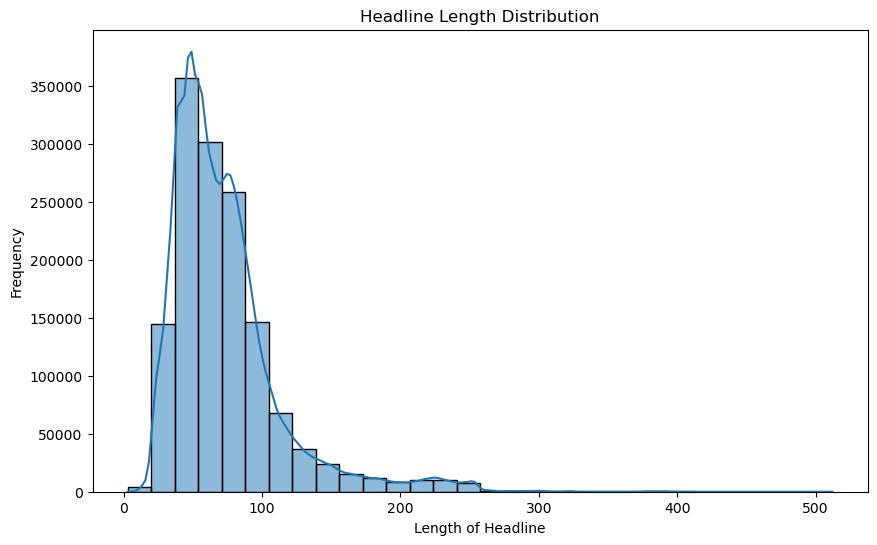

In [26]:
# Visualize the frequency distribution of headline lengths with a histogram and KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Headline Length Distribution')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()

Counting and Visualizing number of articles per publisher

In [1]:
# Determine the frequency of articles published by each publisher
publisher_counts = df['publisher'].value_counts()
print("\nArticles Count per Publisher:")
publisher_counts


# Plot a horizontal bar chart to show article counts per publisher
plt.figure(figsize=(14, 10))
publisher_counts.head(20).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 20 Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher Name')
plt.gca().invert_yaxis()  # Reverse the y-axis to display the highest counts at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

observing trends over time 

###Extract Date and Day of the Week  and Calculate Articles Published per Day:

In [46]:
df['publication_date'] = df['date'].dt.date
df['day_of_week'] = df['date'].dt.day_name()


articles_per_day = df.groupby('publication_date').size()
print("\nNumber of Articles Published Over Time:")
articles_per_day


Number of Articles Published Over Time:


publication_date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-05-30     14
2020-05-31     17
2020-06-01    205
2020-06-02    183
2020-06-03     69
Length: 3946, dtype: int64

#####Visualize Articles Published Over Time

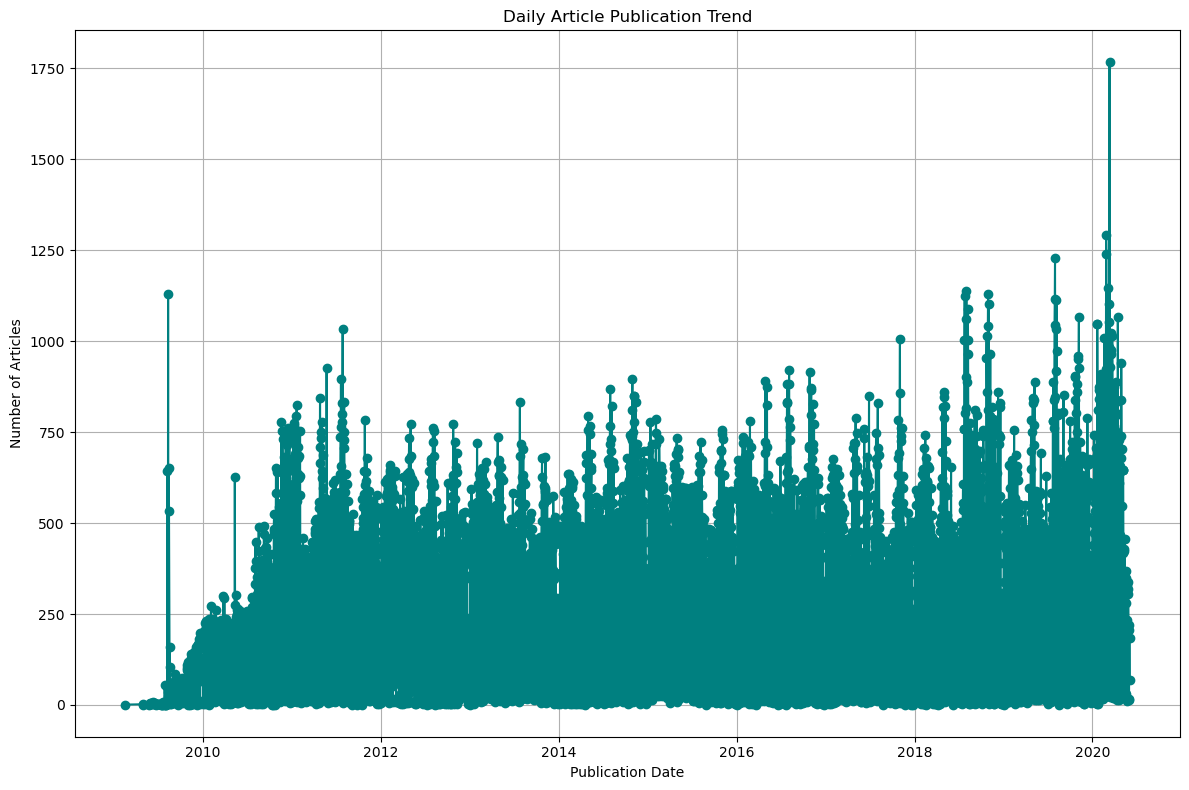

In [49]:
plt.figure(figsize=(12, 8))
articles_per_day.plot(kind='line', color='teal', marker='o')
plt.title('Daily Article Publication Trend')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()

Analyze and Visualize Articles by Day of the Week


Number of Articles by Day of the Week:


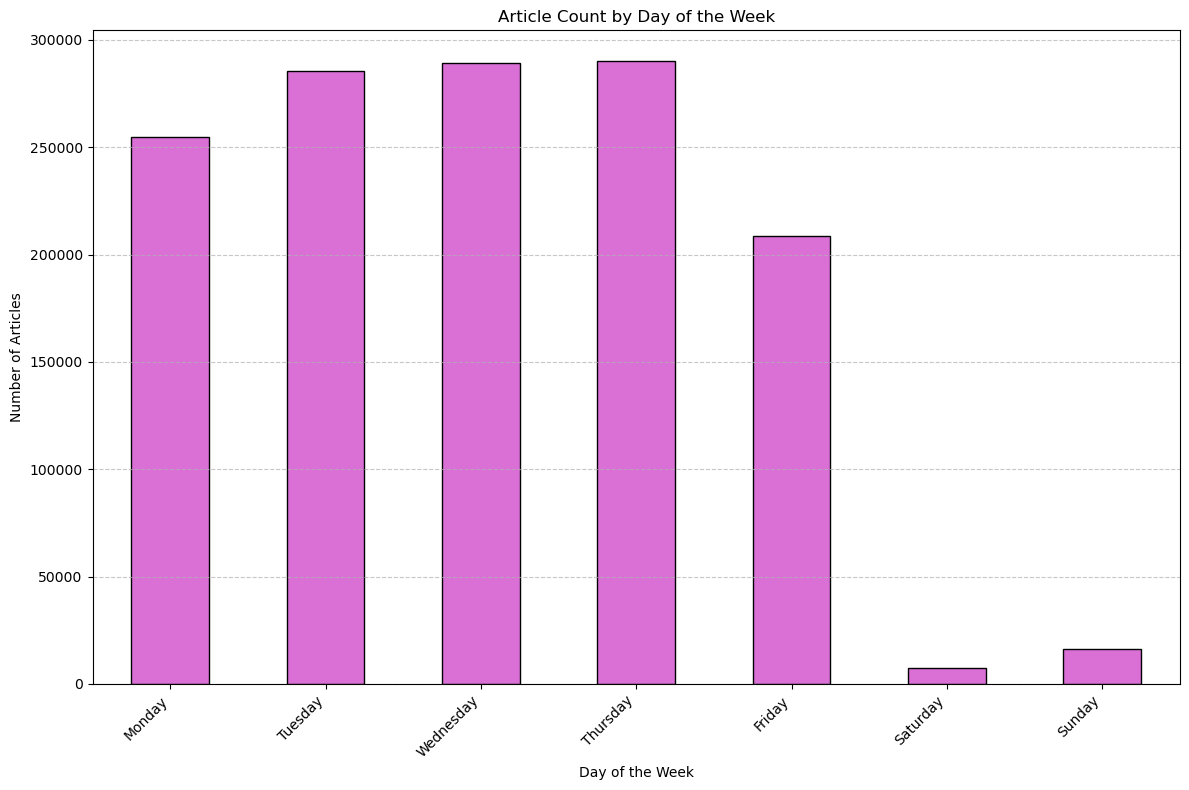

In [52]:
articles_by_day = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("\nNumber of Articles by Day of the Week:")
articles_by_day


plt.figure(figsize=(12, 8))
articles_by_day.plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Article Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()